<a href="https://colab.research.google.com/github/FelipeNunesReis/House-rent-prediction/blob/main/Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df= pd.read_csv('/content/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [2]:
df.shape

(4746, 12)

In [3]:
median_rent = df.groupby('City')['Rent'].median()
city_with_highest_median_rent = median_rent.idxmax()
highest_median_rent_value = median_rent.max()

print(f"The city with the highest median rent is {city_with_highest_median_rent} with a median rent of {highest_median_rent_value}")

The city with the highest median rent is Mumbai with a median rent of 52000.0


In [4]:
import seaborn as sns

<Axes: xlabel='Bathroom', ylabel='Rent'>

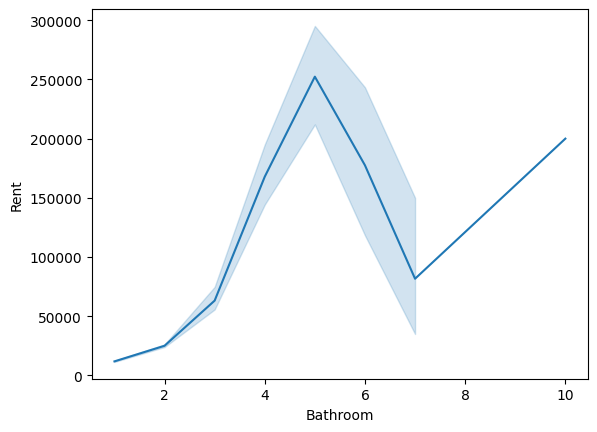

In [5]:
sns.lineplot(data=df, x= 'Bathroom',y='Rent')

<Axes: xlabel='Size', ylabel='Rent'>

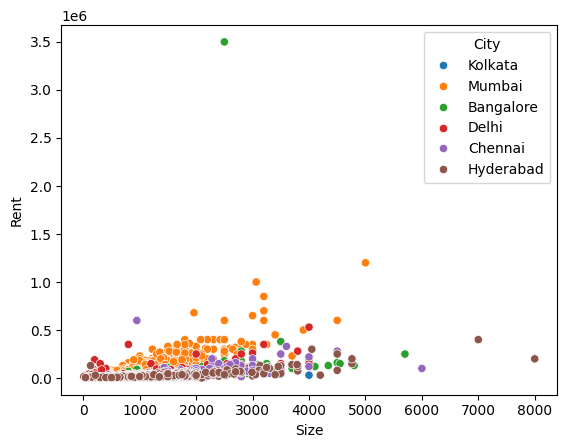

In [11]:
sns.scatterplot(data=df, x= 'Size',y='Rent', hue='City')

In [27]:
city_on_high_rent = df[df['Rent'] == df['Rent'].max()].groupby('City').size()
print(city_on_high_rent)

City
Bangalore    1
dtype: int64
